# Lab Statement
This lab introduces the K-Nearest Neighbor classification algoritm, which is one of the most well known classification methods. This lab is completed using the UCI Iris Flower Dataset.

# Objectives

- Create and use Machine Learning Modeles with SciKit Learn
- Learn more advanced NumPy (Numerical Python) features
- Learn how to import data from remote websties (UCI Machine Learning Datasets)
- Learn how to import and use SciKit Learn built-in datasets (Iris Flower Dataset)
- Train-Test Split of data with SciKit Learn
- Perform Classification with SciKit Learn
- Create Predictive Models
- Perform Model Evaluation
    - Model Source and Accuracy
- Decision Boundary with MatPlotLib

# Introduction

### Supervised Learning: Classification

**Supervised Learning** is the process of building classifcation models using data instances of known origins.

Classification is probably the best understood of all data science strategies. Classification tasks have three common characteristics:
    - Learning is supervised
    - The dependent variable is categorical
    - The emphasis is on building models able to assign new instances to one of a set of well-defined classes

### Introducing the Iris Dataset
- The dataset consists of 50 samples of 3 different species of iris (150 samples total)
- Measurements(cm): sepal length, sepal width, petal length, petal width

<img src="images/iris.png" align="center" width=200; height200>

### Data and Problem Description
Machine Learning on the Iris Dataset
- The problem is framed as a supervised learning problem: Predict the species of an iris using the given measurements
- Good (and popular!) dataset for machine learning because analysis and prediction is relatively easy

# Preliminary Tasks

### Import the Essentials

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

### Load the Iris Flower Dataset into Pandas Dataframe

In [2]:
import pandas as pd
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris_df = pd.read_csv(url, names=names)

### Test to Confirm Data Is In

In [3]:
iris_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


# A Quick Review...

### Review of Machine Learning Terminology
 - Each row is an **observation** (also known as: instance, sample, record)
 - Each column is a **feature** (also known as: input, attribute, independent variable, predictor)

### Classification vs. Regression
 - Each value we are predicting is the **response** (also known as: target, outcome, lable, dependent variable)
 - **Classification** is supervised learning in which the response is categorical
 - **Regression** is supervised learning in which the response is ordered and continuous

### Classifying the Iris Dataset
 - How do we choose **which model to use** for our supervised learning taks?
 - How do we choose the **best tuning parameters** for that model?
 - How do we estimate the **likely performance of my model** on the out-of-sample data?

### We answer the above by recalling our task and approach:
 - **Classification Task**: Prediciting the species of an unknown Iris Flower
 - **Approach**: We will start by using the KNN classification model with K=1 and K=5 (we will use logisictal regression and other models in future labs)
 - We will then train the model on a subset of the dataset (the training set)
 - Implement Model Evaluation Prodecures
     - We will evalusate the **perfomance** of our model based on how well it classifies the test set (the data that remains after we train the model (the training set))
 - We will then use our model for prediction

# Load the Iris Flower Dataset from SciKit-Learn

### Load and Examine the Data

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()

This Iris Object that is returned by "load_iris" is a *Bunch Object* that is similar to a *Python Dictionary Object* and has **keys** and **values**.

In [5]:
print('Keys of the Iris Dataset: \n{}'.format(iris.keys()))

Keys of the Iris Dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


The value of the key DESCR is a short description of the dataset (only some of the descritions are shown below).

In [6]:
print('\n', iris['DESCR'][:497] + '\n...')


 .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
              
...


The value of the key *target_names* is an array of strings containing the species of the flower that we want to predict:

### Print the Encoding Scheme for Species: 0 = Setosa, 1 = Versicolor, 2 = Virginica

In [7]:
print('Target Names: {}'.format(iris.target_names))
print('Data Type: {}'.format(type(iris.target_names)))

Target Names: ['setosa' 'versicolor' 'virginica']
Data Type: <class 'numpy.ndarray'>


### Print the Names of the Four Features

In [8]:
print('Feature Names :\n {}'.format(iris.feature_names))

Feature Names :
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


### Check the Shape of the Data

In [9]:
print('Shape of the Data: {}'.format(iris.data.shape))

Shape of the Data: (150, 4)


### Print Integers Representing the Species of EACH Observation

In [10]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# Creating the Training and Testing Data to Use with Model
The data has been loaded and we need to split it into a training and testing dataset. We will use all four columns (features) for both datasets. First, let's store the *features* in an array that we will call **X** and the *targets* (possible categoreis) into a single column array we call **y**.

In [11]:
#We will use all 4 features of this dataset
X, y = iris.data[:, :4], iris.target

#Print(X)
print('Class Labels:', np.unique(y))
print('Class Proportions:', np.bincount(y))

Class Labels: [0 1 2]
Class Proportions: [50 50 50]


## Train/Test Split of Data
SciKit Learn contains a function called the **train_test_split** function that will randomly shuffle the dataset and then splits it into two datasets: a **Training Set** used to build the model, and a **Test Set** to assess and evaluate how well the model works on unseen data (also called 'Out-of-Sample' data). The **train_test_split** function by default does a 75% train and 25% test split, but the split can be modified by tuning the parameters of the function as indicated below in the code.

### Import train_test_split, and Complete the Split

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 123,
    stratify=y)

### Print Class Labels and Proportions of y_train

In [13]:
print('Class Labels of y_train:', np.unique(y_train))
print('Class Proportions of y_train:', np.bincount(y_train))

Class Labels of y_train: [0 1 2]
Class Proportions of y_train: [38 37 37]


It is a best practice to perform our split in such a way that our split reflects the labels in the data. In other words, we want labels to be split in a train and a test set as they are in the original dataset. So we use the **stratify** argument.

<img src ="images/train_test_split.png" align="center" width=500; height500>

What did this accomplish?
   - Model can be trained and tested on **different data**
   - Response values are known for the testing set, and thus **predictions can be evaluated**
   - **Testing accuracy** is a better estimate than training accuracy of the out-of-sample performance

### Check the Shapes of the Training and Testing Sets to Confirm Split

In [14]:
print("X_train Shape of the Data: {}".format(X_train.shape))
print('y_train Shape of the Data: {}'.format(y_train.shape))
print("X_test Shape of the Data: {}".format(X_test.shape))
print("y_test Shape of the Data: {}".format(y_test.shape))

X_train Shape of the Data: (112, 4)
y_train Shape of the Data: (112,)
X_test Shape of the Data: (38, 4)
y_test Shape of the Data: (38,)


# Building (Fitting) and Evaluating Models
Let's build the actual machine learning models. There are several widely used classification algorithms avaiible in the SciKit-Learn package and three of the most popular ones are:

   - K-Nearest Neighbors
   - Logistic Regression
   - Linear Support Vector Machine

The machine learning models in SciKit-Learn are implemented in their own classes called **Estimator Classes**. Each model ahs its advantages, and we will have to use several to determine how well each model works. We do this by using the **Test Set** that we created earlier. Note that this data *was NOT* used to build (train) this model, but we do know what the species is (correct class labels) for each iris flower in the test set. Thus, we can make a prediction for each iris flower in the test data and compare it to its known class label (**known species**). We can measure how well the model works by compyting the model's  *accuracy*, which is the fraction of flowers for which the right species was predicted.

# Building a K-Nearest Neighbors Model in SciKit-Learn

## K-Nearest Neighbors Fit (K=3)

### Import the Essentials

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

### Pick 3 Nearest Neighbors and Print Confirmation

In [16]:
knn = KNeighborsClassifier(n_neighbors=3)
print(knn)

KNeighborsClassifier(n_neighbors=3)


### Train the Model and Store Predictor in y_pred

In [17]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

### Print Test Set Predictions and Actual Values

In [18]:
print("Test Set Predictions: \n{}".format(y_pred))
print("Actual True Values: \n{}".format(y_test))

Test Set Predictions: 
[2 0 1 2 0 0 1 2 1 0 1 0 2 2 1 2 0 0 0 0 0 0 1 2 0 2 2 2 2 1 1 2 1 1 2 1 2
 1]
Actual True Values: 
[2 0 1 2 0 0 1 2 1 0 1 0 2 2 1 2 0 0 0 0 0 0 1 2 0 1 2 2 2 1 1 2 1 1 2 1 2
 1]


# Evaluating the K-Nearest Neighbors Model
We can evaluate the models's performance in several ways. Two of the simplest ways are illustrated below.

### 1. Use the built-in scoring method

We do this by sending the test sets (both the test features and the associated test labels (categories, classes)

In [19]:
print("Test Accuracy: {0:0.2f}".format(knn.score(X_test, y_test)))

Test Accuracy: 0.97


### 2. Use the SciKit-Learn metrics module we imported

It has a method calssed **accuracy_score** that compares what the model preducts with the true values we expected for associated test labels (categories, classes)

In [20]:
k=knn.n_neighbors
print("Model's Predictive Accuracy for k = {0} is: {1:0.2f} \n".format(k, metrics.accuracy_score(y_test, y_pred)))

Model's Predictive Accuracy for k = 3 is: 0.97 



# Making New Predictions

Let's make a prediction using this model on the new data that the model hasn't seen but we know the class lables. We test it on an iris flower with the following features:

 - **Sepal Length = 5 cm**
 - **Sepal Width = 2.9 cm**
 - **Petal Length = 1 cm**
 - **Petal Width = 0.2 cm**
 
We will put this data into a NumPy array and calculate its shape (1 row) multiplied by its features (4 features)

### Reshaping An Array and Printing to Confirm

In [21]:
X_new = np.array ([[5, 2.9, 1, 0.2]])
print('X_new.shape is: {}'.format(X_new.shape))

X_new.shape is: (1, 4)


To make a prediction, let's again call the *predict method* of the K-Nearest Neighbors object:

In [22]:
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted Target Name: {}".format(iris["target_names"][prediction]))

Prediction: [0]
Predicted Target Name: ['setosa']


So, based on our analysis of the model's test set accuracy of 97% (which means that it made the right prediction 97% of the time), this high level of accuracy may be good enough to use for classifying unknown iris species!

# Creating a K-NN Predictive Model for Multiple K's

### K-Nearest Neighbor Fit for K=1 and K=5

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
for k in [1,5]:
    knn = KNeighborsClassifier(n_neighbors=k)
    print(knn)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print('Test Accuracy (using knn.score()) for k = {0} is: {1:0.2f}'.format(k, knn.score(X_test, y_test)))
    print("Model's Predictive Accuracy for k = {0} is: {1:0.2f} \n".format(k, metrics.accuracy_score(y_test, y_pred)))

KNeighborsClassifier(n_neighbors=1)
Test Accuracy (using knn.score()) for k = 1 is: 0.97
Model's Predictive Accuracy for k = 1 is: 0.97 

KNeighborsClassifier()
Test Accuracy (using knn.score()) for k = 5 is: 0.97
Model's Predictive Accuracy for k = 5 is: 0.97 



# Final Thoughts

 - **The Training Accuracy** rises as the model complexity rises
 - **The Testing Accuracy** penalizes models that are too complex or not complex enough
 - For KNN models, complexity is determined by the **value of K** (lower value = more complex)
 - These classifiers can work in multiple classes, so dealing with a larger number of inputs in a model is straight forward

# Exercises and Questions

1.

In [24]:
#Getting the Data
k_range = []
scores = []
for k in range (1,26):
    knn = KNeighborsClassifier(n_neighbors=k)
    #print(knn)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    k_range.append(k)
    scores.append(knn.score(X_test, y_test))
print(k_range)
print(scores)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
[0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9210526315789473, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9210526315789473, 0.9210526315789473]


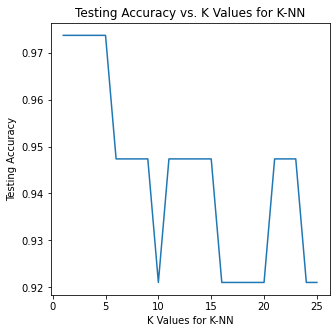

In [25]:
#Plotting the Data
x = [k_range]
y = [scores]
fig = plt.figure(figsize=(5,5))
plt.plot(k_range, scores)
plt.xlabel('K Values for K-NN')
plt.ylabel('Testing Accuracy')
plt.title('Testing Accuracy vs. K Values for K-NN')
plt.show()

From the plot above, we can conclude that the the best K for our K-Nearest Neighbor classifiers can be anything from 1 to 4. After 4, the Testing Accuracy drops down to a little under 95% (about a 3% drop).

2. There a few ways in which a tie can be broken. One of the ways is to decrease the value of k by 1 until the tie is officially broken. Also, another way to break a tie is to take a random vote instead of a majority vote. 

3. According to the SciKit-Learn website, weights are taken into consideration when breaking ties. That is to say that the more weight that a datapoint has on an unknown one, the tie will be broken in that classification's favor.